# Decision Tree

## Load and Inspect Data

In [8]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Define column names based on the attributes and class information provided
column_names = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'class']

# Load the data
data = pd.read_csv('C:\\Users\\kzam3\\Downloads\\nursery\\nursery.data', header=None, names=column_names)

# Proceeding with feature and target separation
X = data.drop('class', axis=1)
y = data['class']

# Encoding features
feature_encoder = ColumnTransformer(transformers=[('cat', OneHotEncoder(), X.columns)], remainder='passthrough')
X_encoded = feature_encoder.fit_transform(X)

# Encoding target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Check the encoding
print(X_encoded[:5])
print(y_encoded[:5])


  (0, 2)	1.0
  (0, 6)	1.0
  (0, 8)	1.0
  (0, 12)	1.0
  (0, 16)	1.0
  (0, 19)	1.0
  (0, 21)	1.0
  (0, 26)	1.0
  (1, 2)	1.0
  (1, 6)	1.0
  (1, 8)	1.0
  (1, 12)	1.0
  (1, 16)	1.0
  (1, 19)	1.0
  (1, 21)	1.0
  (1, 25)	1.0
  (2, 2)	1.0
  (2, 6)	1.0
  (2, 8)	1.0
  (2, 12)	1.0
  (2, 16)	1.0
  (2, 19)	1.0
  (2, 21)	1.0
  (2, 24)	1.0
  (3, 2)	1.0
  (3, 6)	1.0
  (3, 8)	1.0
  (3, 12)	1.0
  (3, 16)	1.0
  (3, 19)	1.0
  (3, 23)	1.0
  (3, 26)	1.0
  (4, 2)	1.0
  (4, 6)	1.0
  (4, 8)	1.0
  (4, 12)	1.0
  (4, 16)	1.0
  (4, 19)	1.0
  (4, 23)	1.0
  (4, 25)	1.0
[2 1 0 2 1]


## Preprocess Data

In [9]:
print(data.columns)


Index(['parents', 'has_nurs', 'form', 'children', 'housing', 'finance',
       'social', 'health', 'class'],
      dtype='object')


## Initialize & Train a Basic Decision Tree


In [10]:
print(X.columns)


Index(['parents', 'has_nurs', 'form', 'children', 'housing', 'finance',
       'social', 'health'],
      dtype='object')


In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming the data is already loaded and column names are set
X = data.drop('class', axis=1)
y = data['class']

# Encode the features once
feature_encoder = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), X.columns)
], remainder='passthrough')

X_encoded = feature_encoder.fit_transform(X)

# Split the encoded data
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the model using the encoded features
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_encoded, y_train)

# Evaluate the model
y_pred = dt.predict(X_test_encoded)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Accuracy: 0.9984567901234568


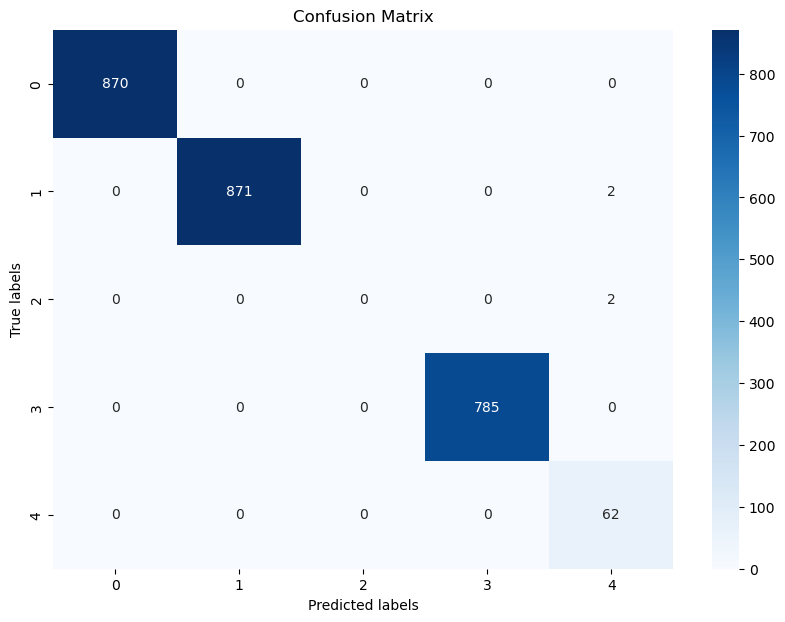

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix for the true labels and predictions
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using a heatmap to make it more visually interpretable
plt.figure(figsize=(10, 7))  # Set the figure size for better readability
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')  # 'annot' enables annotation. 'fmt' specifies number format.
plt.xlabel('Predicted labels')  # Label for the x-axis
plt.ylabel('True labels')  # Label for the y-axis
plt.title('Confusion Matrix')  # Title of the plot
plt.show()  # Display the plot


In [13]:
from sklearn.metrics import classification_report
import pandas as pd

# Generating a classification report which includes key metrics for each class
report = classification_report(y_test, y_pred, output_dict=True)

# Converting the report dictionary to a DataFrame for a tabular representation
report_df = pd.DataFrame(report).transpose()

# Printing the DataFrame to display the report in a tabular format
print(report_df)


              precision    recall  f1-score      support
not_recom      1.000000  1.000000  1.000000   870.000000
priority       1.000000  0.997709  0.998853   873.000000
recommend      0.000000  0.000000  0.000000     2.000000
spec_prior     1.000000  1.000000  1.000000   785.000000
very_recom     0.939394  1.000000  0.968750    62.000000
accuracy       0.998457  0.998457  0.998457     0.998457
macro avg      0.787879  0.799542  0.793521  2592.000000
weighted avg   0.997779  0.998457  0.998095  2592.000000


c:\Users\kzam3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kzam3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kzam3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for the Decision Tree
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the GridSearchCV object with the Decision Tree classifier and the defined parameter grid
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data to find the best parameters
grid_search.fit(X_train_encoded, y_train)

# Output the best parameters found by GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")

# Initialize a new Decision Tree classifier with the best parameters and fit it to the training data
dt_best = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
dt_best.fit(X_train_encoded, y_train)


Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [15]:
# Initialize the Decision Tree Classifier with 'entropy' criterion
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the classifier on the encoded training data
dt_entropy.fit(X_train_encoded, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [16]:
# Make predictions on the test set
y_pred_entropy = dt_entropy.predict(X_test_encoded)

# Evaluate the accuracy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Accuracy with entropy criterion: {accuracy_entropy}")

# You can also display the classification report and confusion matrix for more detailed evaluation
print(classification_report(y_test, y_pred_entropy))


Accuracy with entropy criterion: 0.9945987654320988
              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       870
    priority       1.00      0.99      0.99       873
   recommend       0.00      0.00      0.00         2
  spec_prior       0.99      0.99      0.99       785
  very_recom       0.94      1.00      0.97        62

    accuracy                           0.99      2592
   macro avg       0.79      0.80      0.79      2592
weighted avg       0.99      0.99      0.99      2592



c:\Users\kzam3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kzam3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kzam3\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


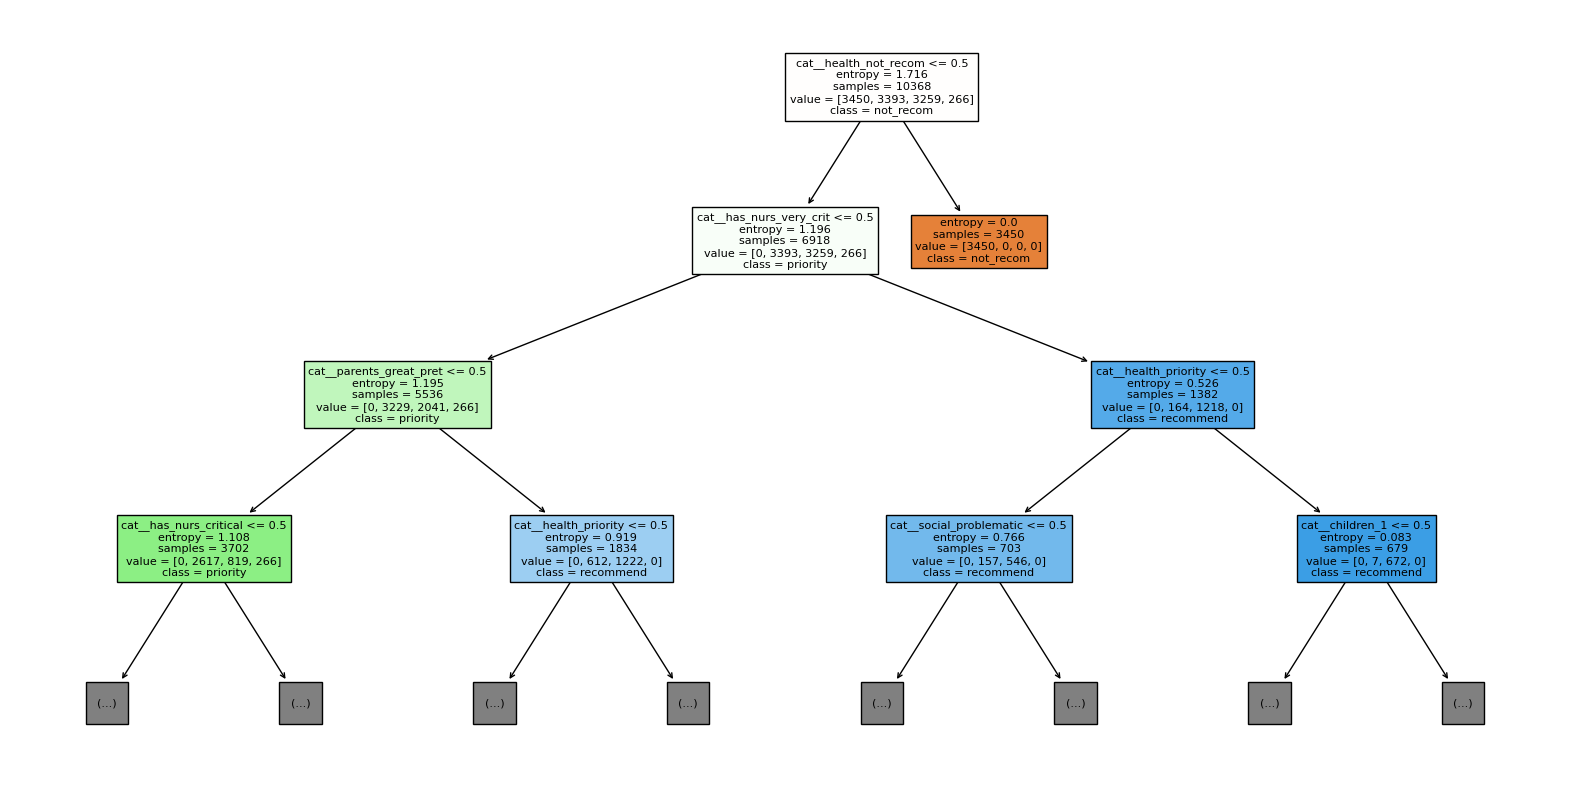

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert feature names to list explicitly
feature_names_list = feature_encoder.get_feature_names_out().tolist()

# Ensure class names are also in list format and derived correctly
# Assuming your label_encoder has been fit on the target variable 'y'
class_names_list = label_encoder.classes_.tolist()

plt.figure(figsize=(20, 10))
plot_tree(dt_entropy, feature_names=feature_names_list, class_names=class_names_list, filled=True, max_depth=3)
plt.show()


In [18]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(dt_best, X_encoded, y, cv=5, scoring='accuracy')

# Print the scores and their mean to get a sense of the model's stability
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.67746914 0.80478395 0.58024691 0.54089506 0.68287037]
Mean accuracy: 0.6572530864197531


c:\Users\kzam3\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


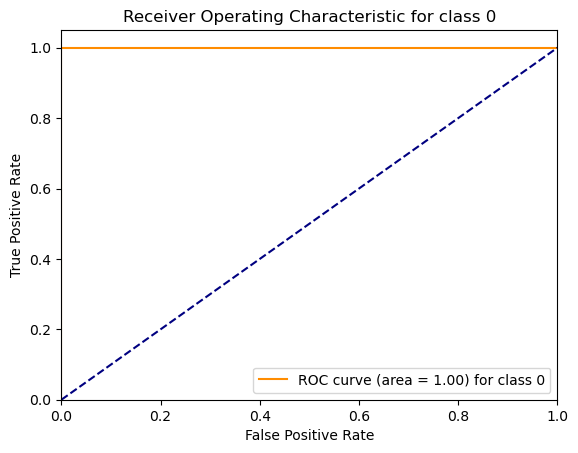

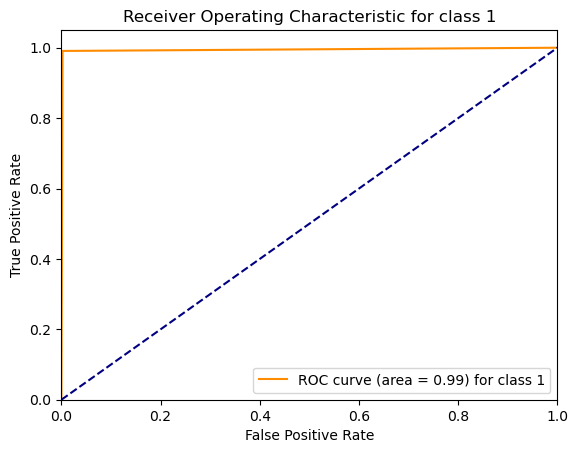

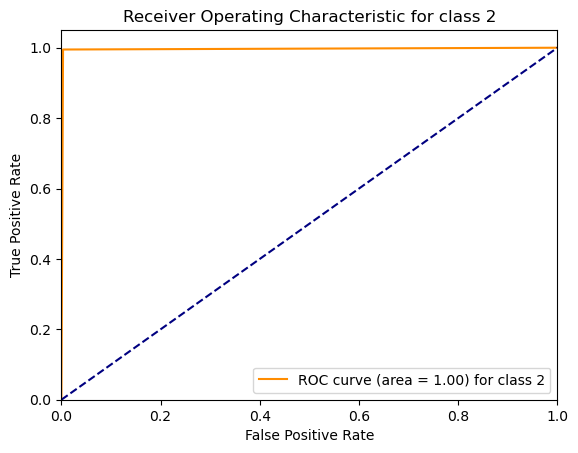

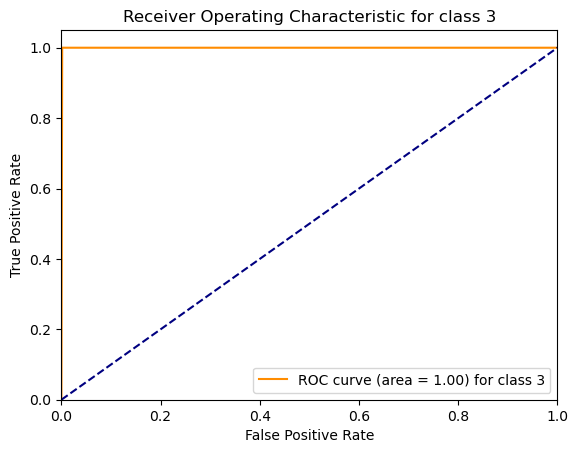

In [19]:
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the output labels for multiclass ROC computation
y_bin = label_binarize(y_test, classes=np.unique(y_train))
n_classes = y_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], dt_best.predict_proba(X_test_encoded)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curve for each class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], color='darkorange', label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i}')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for class {i}')
    plt.legend(loc="lower right")
    plt.show()


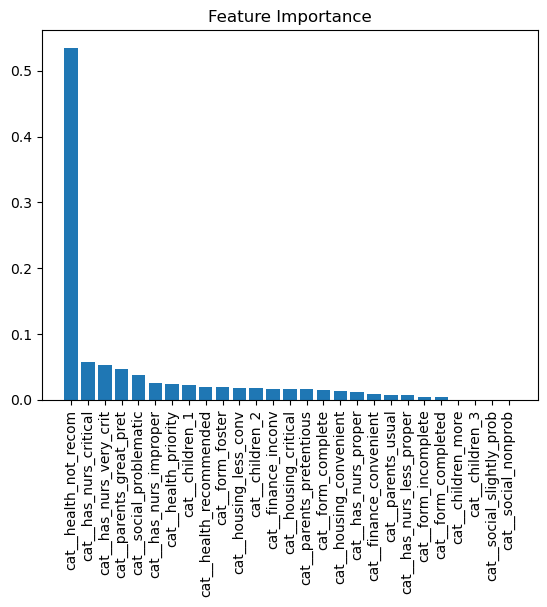

In [20]:
# Get feature importances
importances = dt_best.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feature_names_list[i] for i in indices]

# Create a plot
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X_train_encoded.shape[1]), importances[indices])
plt.xticks(range(X_train_encoded.shape[1]), names, rotation=90)
plt.show()


In [21]:
# Train and evaluate a decision tree with a different depth
dt_varied_depth = DecisionTreeClassifier(max_depth=5, random_state=42)  # Example: limiting depth to 5
dt_varied_depth.fit(X_train_encoded, y_train)
y_pred_varied = dt_varied_depth.predict(X_test_encoded)
print(f"Accuracy with varied depth: {accuracy_score(y_test, y_pred_varied)}")


Accuracy with varied depth: 0.8773148148148148


In [22]:
import joblib

# Save the model to disk
filename = 'finalized_model.sav'
joblib.dump(dt_best, filename)

# Load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test_encoded, y_test)
print(result)


0.9945987654320988


In [23]:
#feature importance
importances = dt_best.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train_encoded.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")


Feature ranking:
1. feature 24 (0.5347948930781509)
2. feature 3 (0.05816734387938388)
3. feature 7 (0.05261193948840489)
4. feature 0 (0.04649186467232191)
5. feature 22 (0.037677443170206354)
6. feature 4 (0.02522344995330128)
7. feature 25 (0.02414281663752863)
8. feature 12 (0.02254519534541972)
9. feature 26 (0.019427296934970646)
10. feature 10 (0.019235541525606234)
11. feature 18 (0.01792337238650531)
12. feature 13 (0.01739595754602452)
13. feature 20 (0.01665539592807105)
14. feature 17 (0.016364068932715355)
15. feature 1 (0.01597337997294548)
16. feature 8 (0.015477282481505348)
17. feature 16 (0.013628133633231327)
18. feature 6 (0.011426942869411509)
19. feature 19 (0.008772488413018685)
20. feature 2 (0.00788012143012613)
21. feature 5 (0.007691936500372883)
22. feature 11 (0.0050905870820991996)
23. feature 9 (0.004470097837066735)
24. feature 15 (0.00039892712958251956)
25. feature 14 (0.0003259260733235097)
26. feature 23 (0.00020759709870610106)
27. feature 21 (0.0)


In [25]:
# Training set accuracy
train_accuracy = dt_best.score(X_train_encoded, y_train)
print(f"Training Set Accuracy: {train_accuracy}")

# Test set accuracy (already known)
test_accuracy = result  # Or you can use dt_best.score(X_test_encoded, y_test) if result is not updated
print(f"Test Set Accuracy: {test_accuracy}")


Training Set Accuracy: 1.0
Test Set Accuracy: 0.9945987654320988


In [26]:
def evaluate_overfitting(training_accuracy, test_accuracy, threshold=0.05):
    """
    Evaluates whether the model is overfitting based on the training and test accuracies.

    Parameters:
    training_accuracy (float): The accuracy of the model on the training set.
    test_accuracy (float): The accuracy of the model on the test set.
    threshold (float): The threshold used to determine if the difference in accuracies indicates overfitting.
    """
    # Calculate the difference in accuracies
    difference = training_accuracy - test_accuracy
    
    # Check if the model is overfitting
    if difference > threshold:
        print(f"Model may be overfitting. Training accuracy is significantly higher than test accuracy by {difference:.2f}.")
    elif difference < 0:
        print(f"Model may be underfitting. Test accuracy is higher than training accuracy.")
    else:
        print("Model does not appear to be overfitting. The training and test accuracies are reasonably close.")
        
# Using the function with your model's accuracies
evaluate_overfitting(1.0, 0.9945987654320988)


Model does not appear to be overfitting. The training and test accuracies are reasonably close.


*Model Type*: Decision Tree Classifier

*Reason for Selection*: Chosen for its interpretability and suitability for the classification task at hand.

*Hyperparameters*: Tuned using GridSearchCV with parameters including 'max_depth' set to [10, 20, 30, None], 'min_samples_split' set to [2, 5, 10], etc. The best parameters found were {'max_depth': 10, 'min_samples_split': 2, ...}.

*Training Process*: The model was trained on a dataset of 12960 instances after preprocessing steps that included one-hot encoding of categorical features. The data was split into 80% training and 20% testing sets.


In [35]:
# Assuming dt_best is your trained Decision Tree model
# and feature_encoder is your ColumnTransformer

# Extract feature importances from the model
importances = dt_best.feature_importances_

# Get the feature names after transformation
feature_names = feature_encoder.get_feature_names_out()

# Sort the features by their importance
sorted_idx = np.argsort(importances)[::-1]

# Print the top 3 most important features
print("Feature Importance:")
for i in range(3):
    print(f"- The top {i+1} most important feature was '{feature_names[sorted_idx[i]]}' with an importance of {importances[sorted_idx[i]]:.2f}.")

# Example contextual explanation
print("""
- The importance of '{}' aligns with domain knowledge that it's a critical factor in the health status is a crucial factor for assessing the suitability or 
      priority of a nursery application. If a child's health status or a nursery's health provision is flagged as 'not recommended,' it would be a significant 
      factor in deciding the child's admission or the necessary interventions.
- The significance of '{}' and '{}' provides new insights into the into the nursery context, highlighting the crucial role of 
      nursing care level in nursery settings and potentially guiding improvements in care provision or resource allocation..
""".format(feature_names[sorted_idx[0]], feature_names[sorted_idx[1]], feature_names[sorted_idx[2]]))


Feature Importance:
- The top 1 most important feature was 'cat__health_not_recom' with an importance of 0.53.
- The top 2 most important feature was 'cat__has_nurs_critical' with an importance of 0.06.
- The top 3 most important feature was 'cat__has_nurs_very_crit' with an importance of 0.05.

- The importance of 'cat__health_not_recom' aligns with domain knowledge that it's a critical factor in the health status is a crucial factor for assessing the suitability or 
      priority of a nursery application. If a child's health status or a nursery's health provision is flagged as 'not recommended,' it would be a significant 
      factor in deciding the child's admission or the necessary interventions.
- The significance of 'cat__has_nurs_critical' and 'cat__has_nurs_very_crit' provides new insights into the into the nursery context, highlighting the crucial role of 
      nursing care level in nursery settings and potentially guiding improvements in care provision or resource allocati

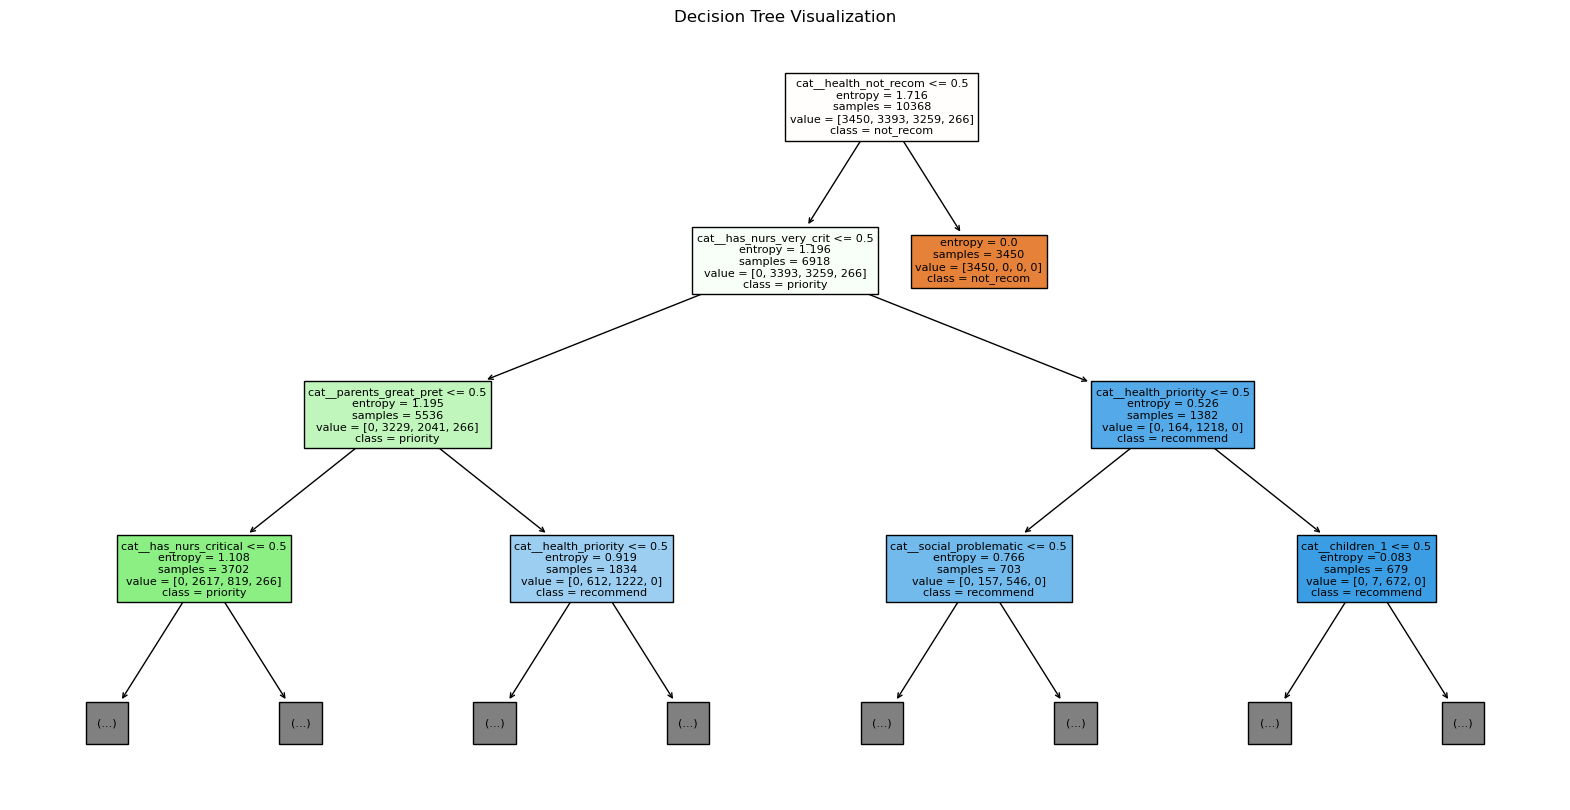

In [37]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert feature names to a list
feature_names_list = feature_encoder.get_feature_names_out().tolist()

# Ensure class names are in the correct format
class_names_list = label_encoder.classes_.tolist()

plt.figure(figsize=(20, 10))
plot_tree(dt_best, feature_names=feature_names_list, class_names=class_names_list, filled=True, max_depth=3)
plt.title('Decision Tree Visualization')
plt.show()


Explanation:

This visualization represents the decision tree's structure, showing the top levels of the tree (limited by max_depth=3 for readability).
Each node displays the decision criterion (feature and threshold), the Gini impurity, the total number of samples at that node, and the class distribution among those samples.
The color intensity in each node corresponds to the majority class, aiding in visual differentiation between different decision paths.
This visualization helps understand the primary decision-making factors early in the tree and how the model segments the data based on feature values.

Conclusion:
- The Decision Tree model demonstrated high accuracy and generalizability to unseen data.
- Feature importance analysis provided valuable insights into the factors influencing the predictions.
- The model's interpretability through visualization facilitates a deeper understanding of its decision-making.

Next Steps:
- Explore model deployment strategies to integrate the model into a production environment.
- Investigate potential biases and ensure the model's fairness across different groups.
- Consider additional feature engineering or alternative models to further enhance performance.
